In [6]:
import numpy as np
import pandas as pd
import pickle
from scipy.stats import gaussian_kde
from scipy.integrate import trapz
import matplotlib.pyplot as plt
import seaborn as sns

# Load the normalized KDE data
with open("election_kde_normalized.pkl", 'rb') as f:
    normalized_kde_data = pickle.load(f)

# Function to compute KDE
def compute_kde(data_points, num_points=1000):
    density = gaussian_kde(data_points)
    x_vals = np.linspace(min(data_points), max(data_points), num_points)
    y_vals = density(x_vals)
    return x_vals, y_vals

# Function to normalize KDE
def normalize_kde(kde_x, kde_y):
    min_x = min(kde_x)
    max_x = max(kde_x)
    normalized_x = (kde_x - min_x) / (max_x - min_x)
    area = trapz(kde_y, normalized_x)
    normalized_y = kde_y / area
    return normalized_x, normalized_y

# Function to ensure peak is on the left
def ensure_peak_on_left(kde_x, kde_y):
    peak_idx = np.argmax(kde_y)
    if peak_idx > len(kde_x) // 2:
        adjusted_x = 1 - kde_x
        adjusted_y = kde_y[::-1]
    else:
        adjusted_x = kde_x
        adjusted_y = kde_y
    return adjusted_x, adjusted_y

# Function to average KDEs with peak on the left
def average_kdes_with_peak_on_left(election_names, normalized_kde_data):
    sum_x = np.zeros_like(normalized_kde_data[election_names[0]][0])
    sum_y = np.zeros_like(normalized_kde_data[election_names[0]][1])
    for election in election_names:
        adjusted_x, adjusted_y = ensure_peak_on_left(normalized_kde_data[election][0], normalized_kde_data[election][1])
        sum_x += adjusted_x
        sum_y += adjusted_y
    num_elections = len(election_names)
    averaged_x = sum_x / num_elections
    averaged_y = sum_y / num_elections
    return averaged_x, averaged_y

# Function to plot KDE
def plot_kde(kde_x, kde_y, title='Kernel Density Estimation'):
    plt.figure(figsize=(10, 6))
    plt.plot(kde_x, kde_y, label="KDE", color='blue')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)
    plt.legend()
    plt.show()

# Function to average and plot KDEs
def average_and_plot(election_names, title):
    averaged_x, averaged_y = average_kdes_with_peak_on_left(election_names, normalized_kde_data)
    plot_kde(averaged_x, averaged_y, title=title)

Alaska_08162022_HouseofRepresentativesSpecial.csv
Alaska_11082022_USRepresentative.csv
Maine_11062018_CongressionalDistrict2.csv
Maine_11082022_CongressionalDistrict2.csv
Alaska_11082022_USSenator.csv
Alaska_11082022_GovernorLieutenantGovernor.csv
Alaska_11082022_HouseDistrict1.csv
Alaska_11082022_HouseDistrict2.csv
Alaska_11082022_HouseDistrict4.csv
Alaska_11082022_HouseDistrict5.csv
Alaska_11082022_HouseDistrict6.csv
Alaska_11082022_HouseDistrict7.csv
Alaska_11082022_HouseDistrict9.csv
Alaska_11082022_HouseDistrict10.csv
Alaska_11082022_HouseDistrict11.csv
Alaska_11082022_HouseDistrict12.csv
Alaska_11082022_HouseDistrict13.csv
Alaska_11082022_HouseDistrict14.csv
Alaska_11082022_HouseDistrict15.csv
Alaska_11082022_HouseDistrict16.csv
Alaska_11082022_HouseDistrict17.csv
Alaska_11082022_HouseDistrict18.csv
Alaska_11082022_HouseDistrict19.csv
Alaska_11082022_HouseDistrict20.csv
Alaska_11082022_HouseDistrict21.csv
Alaska_11082022_HouseDistrict22.csv
Alaska_11082022_HouseDistrict23.csv
Ala

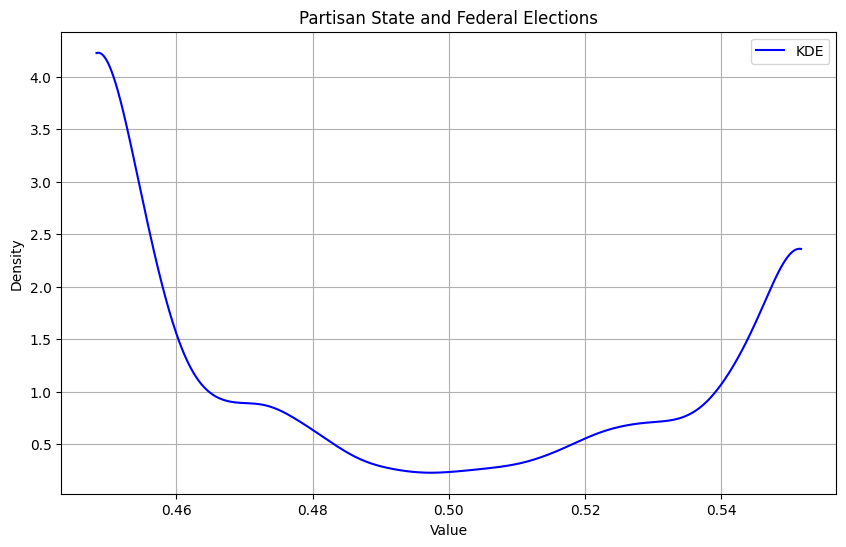

Albany_11082022_BoardofEducation.csv
Minneapolis_11022021_ParkBoardAtLarge.csv
Minneapolis_11022021_ParkBoardDistrict2.csv
Minneapolis_11022021_ParkBoardDistrict3.csv
Minneapolis_11022021_ParkBoardDistrict4.csv
Minneapolis_11022021_ParkBoardDistrict5.csv
Minneapolis_11022021_ParkBoardDistrict6.csv
Minneapolis_11052013_PRBoardDistrict2.csv
Minneapolis_11052013_PRBoardDistrict6.csv
Minneapolis_11062009_PRBoardDistrict1.csv
Minneapolis_11062009_PRBoardDistrict2.csv
Minneapolis_11062009_PRBoardDistrict3.csv
Minneapolis_11062009_PRBoardDistrict5.csv
Minneapolis_11062009_PRBoardDistrict6.csv
Minneapolis_11072017_PRBoardDistrict1.csv
Minneapolis_11072017_PRBoardDistrict2.csv
Minneapolis_11072017_PRBoardDistrict3.csv
Minneapolis_11072017_PRBoardDistrict4.csv
Minneapolis_11072017_PRBoardDistrict5.csv
Minneapolis_11072017_PRBoardDistrict6.csv
Oakland_11022010_SchoolDirectorDistrict4.csv
Oakland_11032020_SchoolDirectorDist1OaklandRCV.csv
Oakland_11032020_SchoolDirectorDist3OaklandRCV.csv
Oakland_

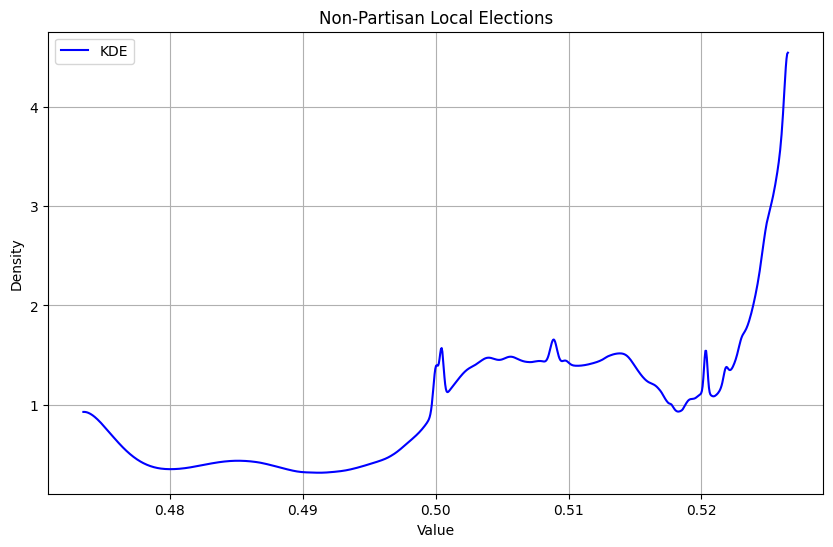

Testing for target election:


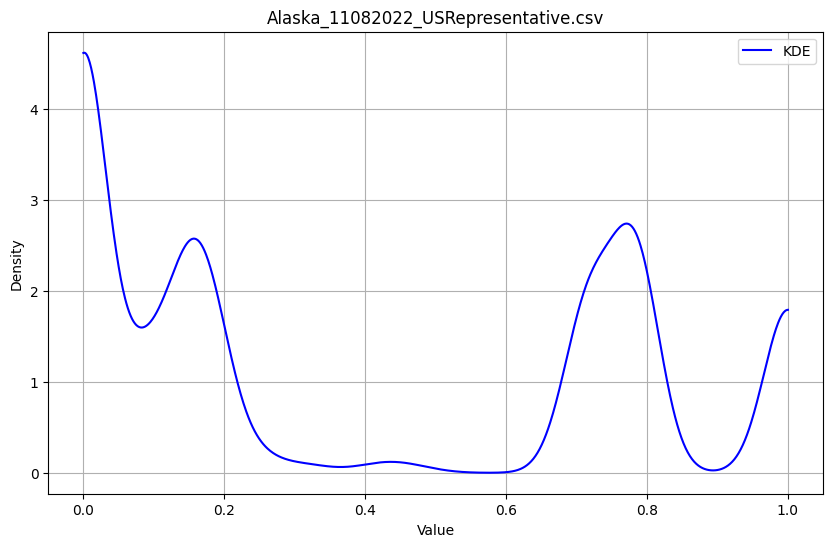

In [7]:
# Load the normalized KDE data from the pickle file
with open("election_kde_normalized.pkl", 'rb') as f:
    normalized_kde_data = pickle.load(f)

# Function to filter elections
def filter_elections(filter_criteria):
    election_df = pd.read_csv("election_table.csv")
    for key, value in filter_criteria.items():
        if isinstance(value, list):
            election_df = election_df[election_df[key].isin(value)]
        else:
            election_df = election_df[election_df[key] == value]
    filtered_elections = election_df['filename'].tolist()
    election_list = [election for election in filtered_elections if election in normalized_kde_data]
    return election_list

# Filter and average for STATE and FEDERAL level elections with YES in partisan
filter_criteria = {'level': ['FEDERAL', 'STATE'], 'partisan': 'YES'}
state_federal_points = filter_elections(filter_criteria)
for election in state_federal_points:
    print(election)
print("(Method 2) Averaging for STATE and FEDERAL level elections with YES in partisan:")
average_and_plot(state_federal_points, "Partisan State and Federal Elections")

# Filter and average for LOCAL elections with NO in partisan
filter_criteria = {'level': 'LOCAL', 'partisan': 'NO'}
local_points = filter_elections(filter_criteria)
for election in local_points:
    print(election)
print("(Method 2) Averaging for LOCAL elections with NO in partisan:")
average_and_plot(local_points, "Non-Partisan Local Elections")

# Testing for a single election
print("Testing for target election:")
average_and_plot(["Alaska_11082022_USRepresentative.csv"], "Alaska_11082022_USRepresentative.csv")

In [23]:
from scipy.stats import wasserstein_distance, entropy
from scipy.interpolate import interp1d
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def calculate_wasserstein_distance(kde1, kde2):
    """
    Calculate the Wasserstein distance between two KDEs.
    """
    x1, y1 = kde1
    x2, y2 = kde2
    
    # Interpolate both KDEs to a common set of x-values
    common_x = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 1000)
    interp1 = interp1d(x1, y1, kind='linear', bounds_error=False, fill_value=0)
    interp2 = interp1d(x2, y2, kind='linear', bounds_error=False, fill_value=0)
    
    y1_common = interp1(common_x)
    y2_common = interp2(common_x)
    
    # Calculate Wasserstein distance
    return wasserstein_distance(y1_common, y2_common)

def calculate_kl_divergence(kde1, kde2):
    """
    Calculate the Kullback-Leibler divergence between two KDEs.
    """
    x1, y1 = kde1
    x2, y2 = kde2
    
    # Interpolate both KDEs to a common set of x-values
    common_x = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 1000)
    interp1 = interp1d(x1, y1, kind='linear', bounds_error=False, fill_value=0)
    interp2 = interp1d(x2, y2, kind='linear', bounds_error=False, fill_value=0)
    
    y1_common = interp1(common_x)
    y2_common = interp2(common_x)
    
    # Since KL divergence is not defined when y2 has zeros where y1 has non-zeros,
    # add a small constant to avoid division by zero.
    y2_common += 1e-10
    
    # Calculate Kullback-Leibler divergence
    return entropy(y1_common, y2_common)

# Function to calculate distance matrix using a given metric function
def calculate_distance_matrix(kde_dict, distance_func):
    """
    Calculate the distance matrix for a set of KDEs using a given distance function.
    """
    keys = list(kde_dict.keys())
    num_keys = len(keys)
    distance_matrix = np.zeros((num_keys, num_keys))
    
    for i in range(num_keys):
        for j in range(i+1, num_keys):
            dist = distance_func(kde_dict[keys[i]], kde_dict[keys[j]])
            distance_matrix[i, j] = dist
            distance_matrix[j, i] = dist  # Distance matrix is symmetric
    
    return distance_matrix, keys

def cluster_and_plot(election_keys, distance_matrix, title):
    """
    Perform hierarchical clustering using the given distance matrix and plot the dendrogram.
    """
    # Perform hierarchical clustering
    Z = linkage(distance_matrix, method='average', optimal_ordering=True)
    
    # Calculate dynamic figure height based on the number of elections
    num_elections = len(election_keys)
    fig_height = max(3, num_elections * 0.25)  # 0.25 inch per election, with a minimum height of 3 inches
    
    # Plot dendrogram
    plt.figure(figsize=(8, fig_height))
    dendrogram(Z, labels=election_keys, orientation='left', leaf_rotation=0)
    plt.title(title)
    plt.ylabel('Election')
    plt.xlabel('Distance')
    plt.show()

Clustering for STATE and FEDERAL level elections with YES in partisan:


/var/folders/g2/25z774tn0599smwks8_v_k200000gp/T/ipykernel_1052/3926374983.py:68: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='average', optimal_ordering=True)


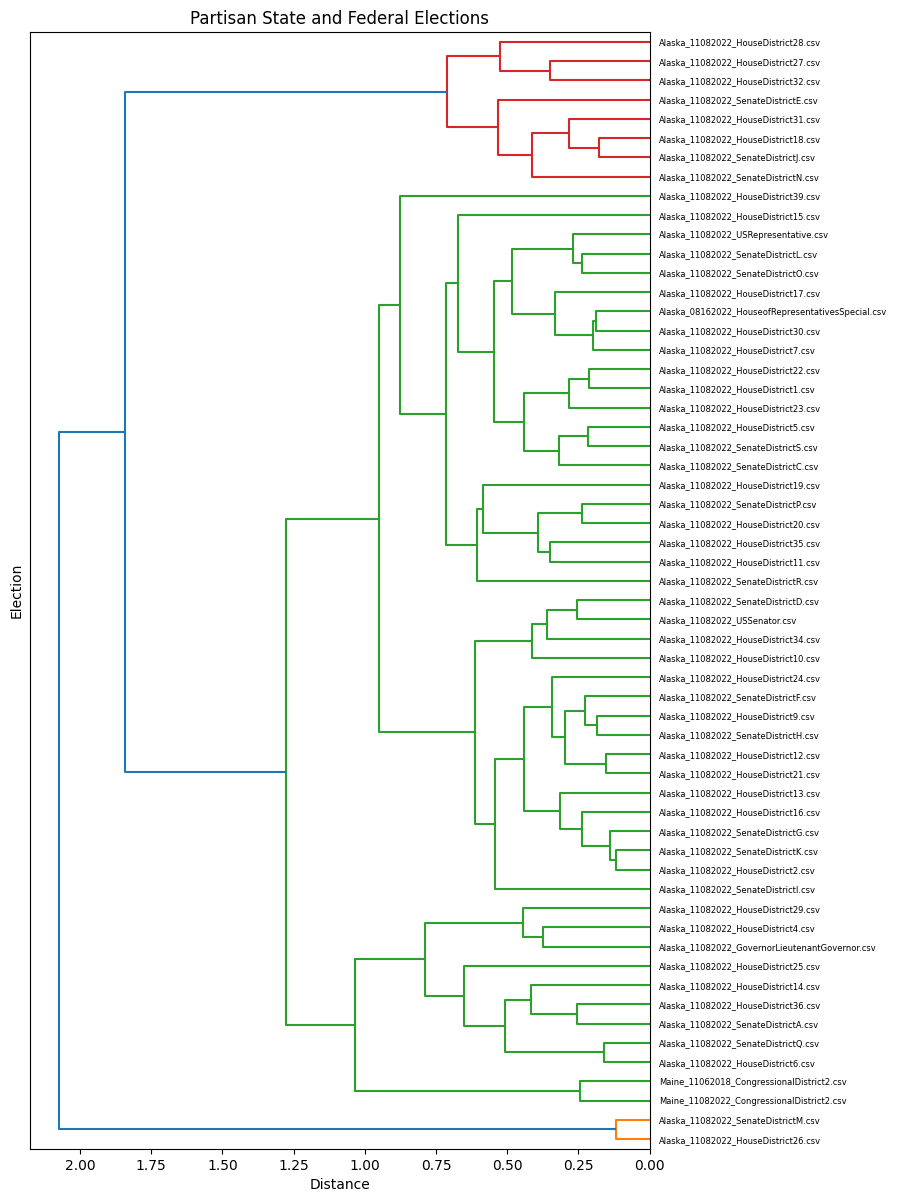

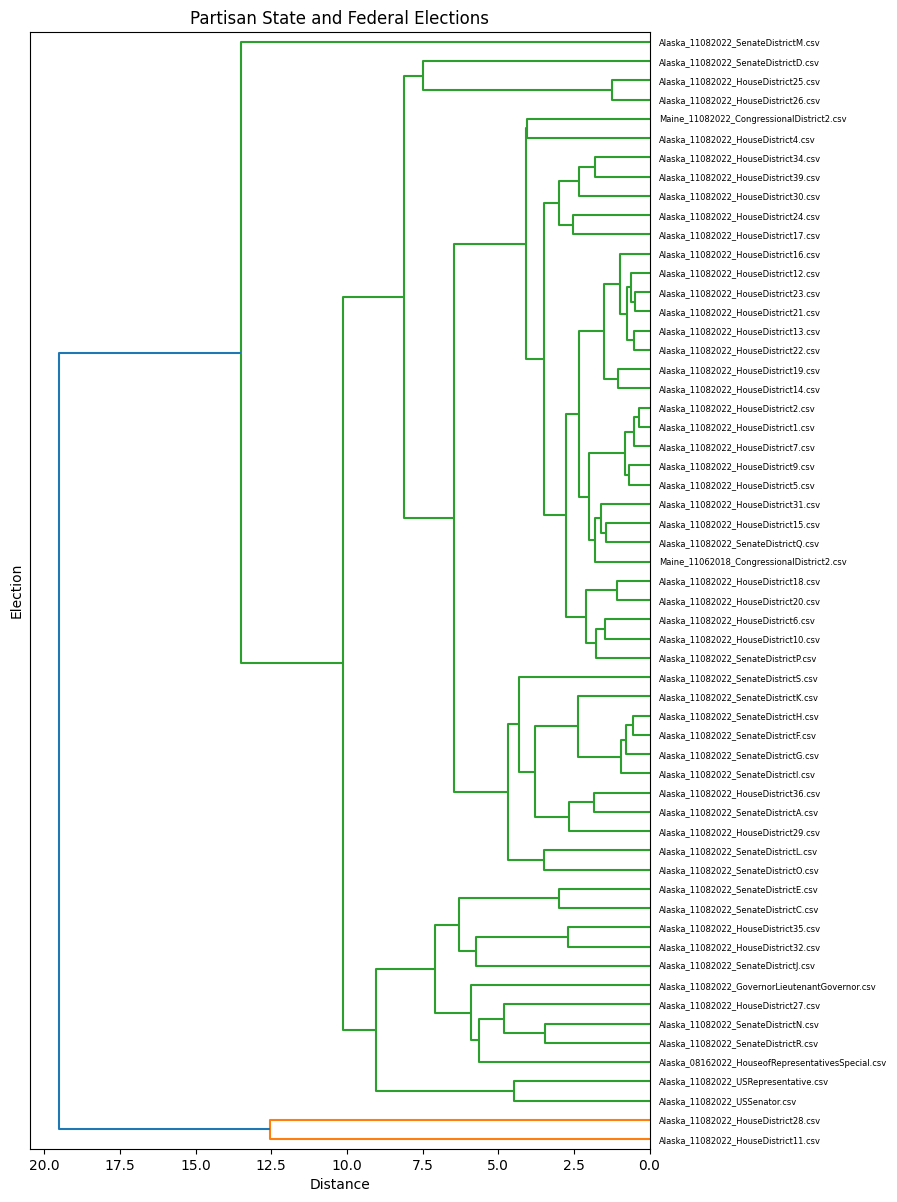

Clustering for LOCAL elections with NO in partisan:


/var/folders/g2/25z774tn0599smwks8_v_k200000gp/T/ipykernel_1052/3926374983.py:68: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='average', optimal_ordering=True)


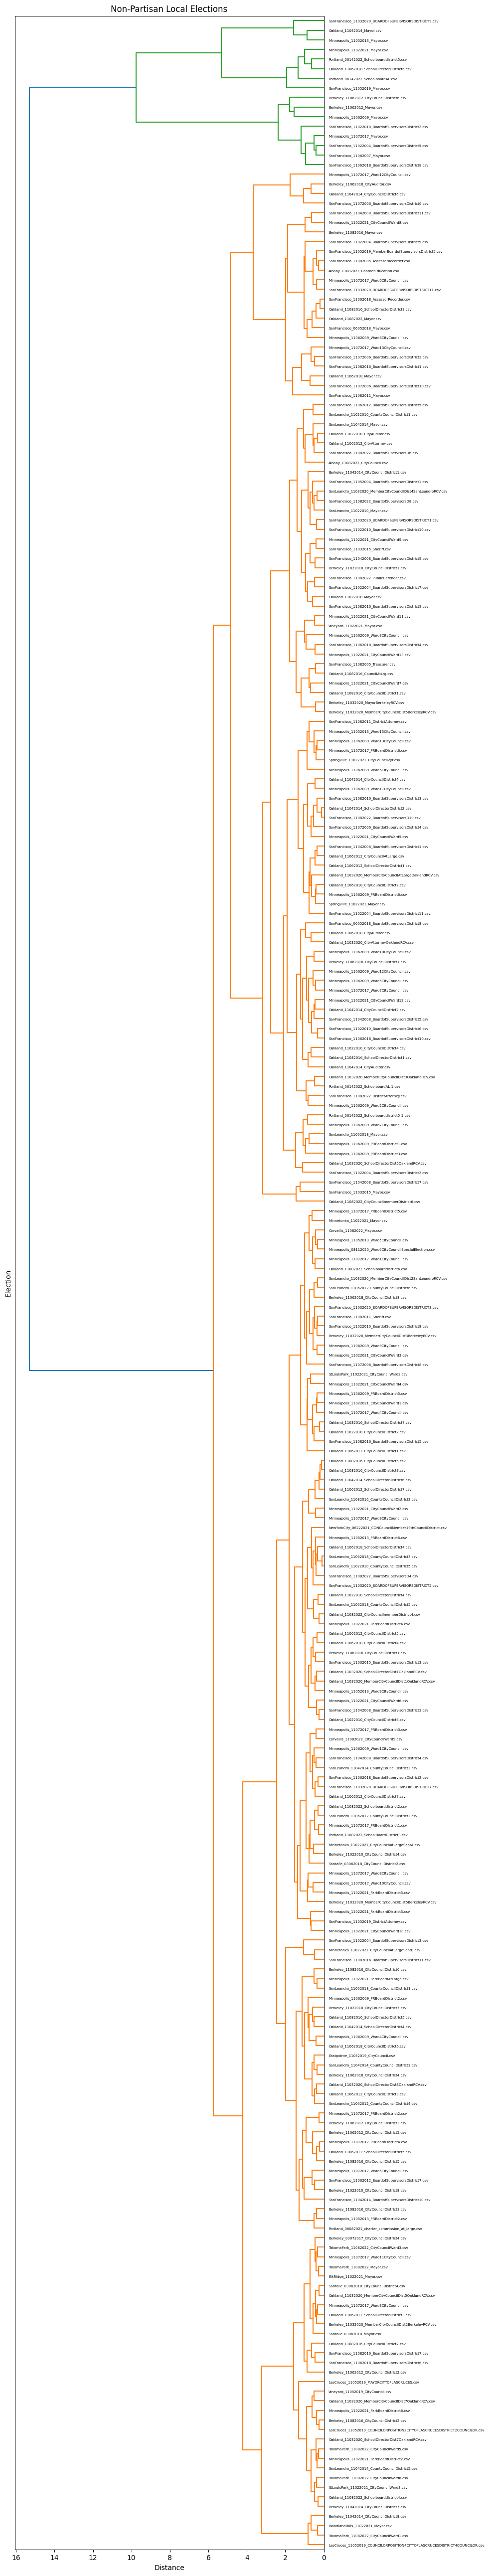

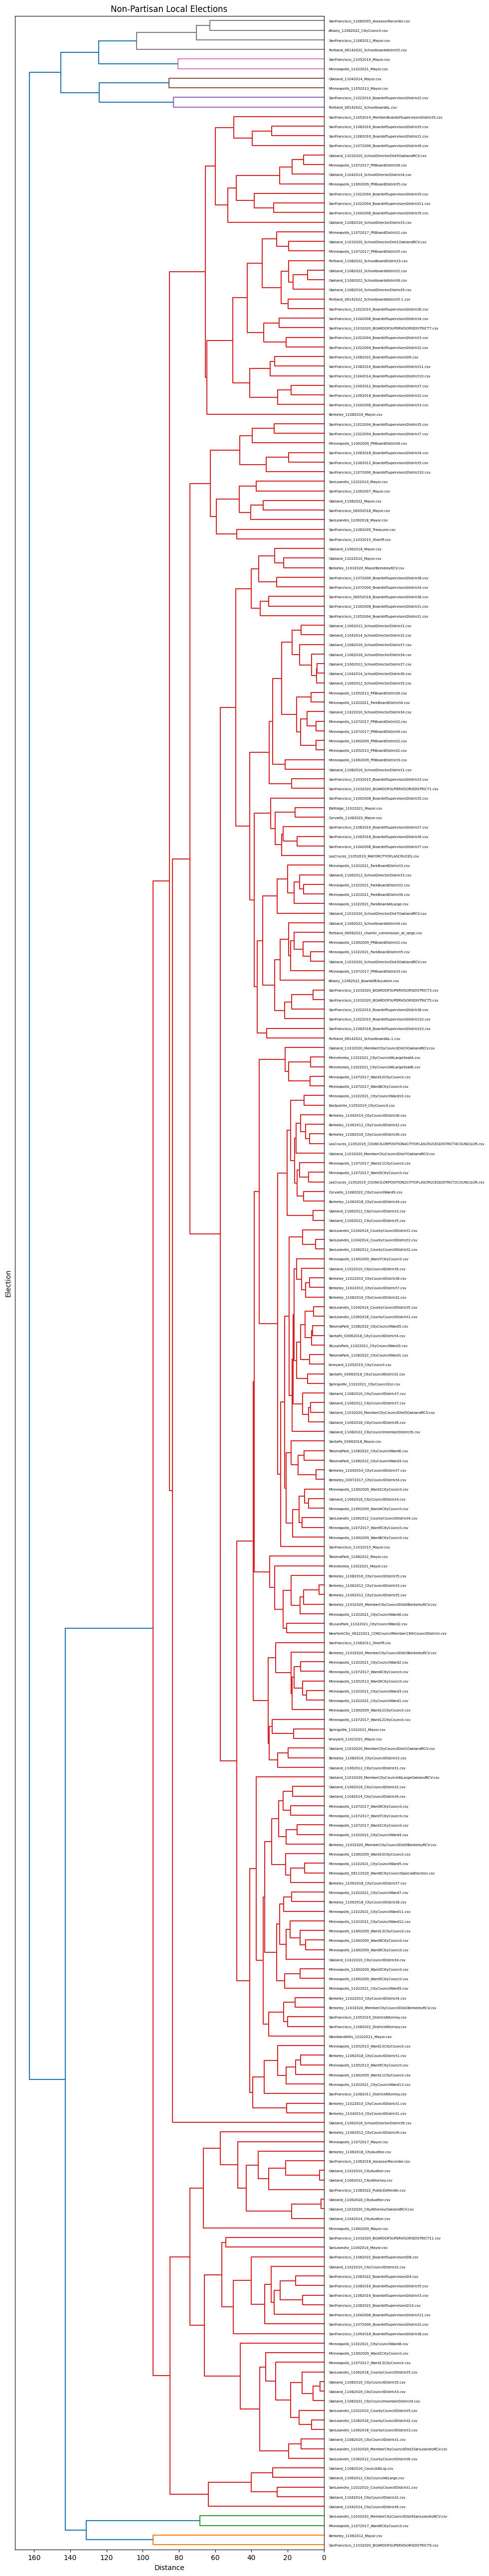

Clustering for Test Elections:


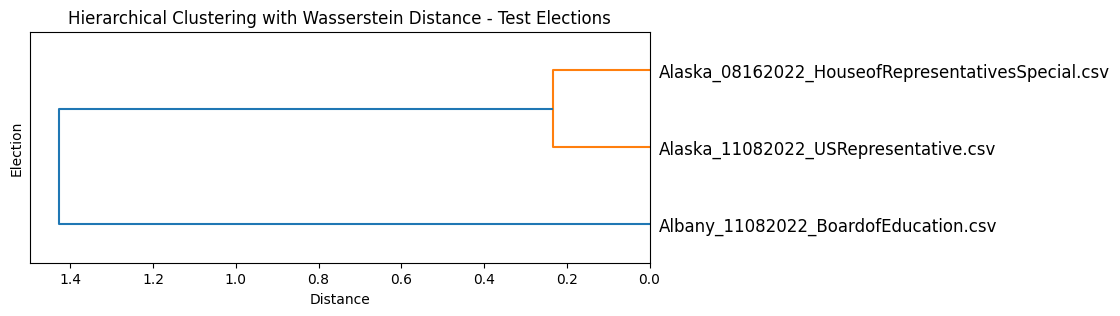

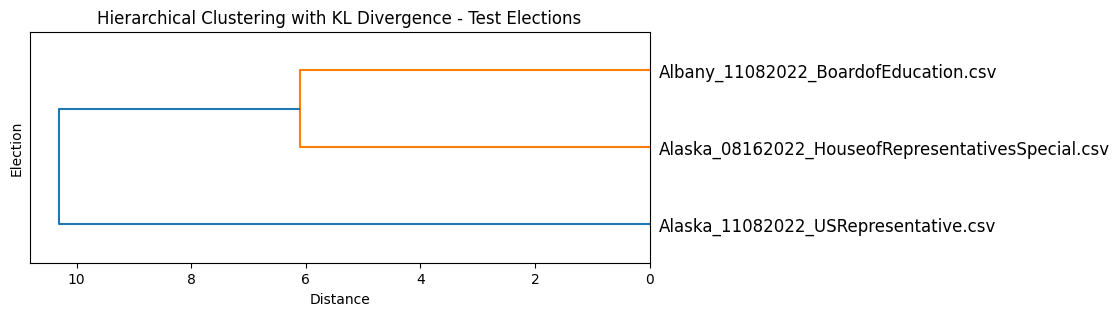

In [24]:
# Load the normalized KDE data from the pickle file
with open("election_kde_normalized.pkl", 'rb') as f:
    normalized_kde_data = pickle.load(f)

# Function to filter elections
def filter_elections(filter_criteria):
    election_df = pd.read_csv("election_table.csv")
    for key, value in filter_criteria.items():
        if isinstance(value, list):
            election_df = election_df[election_df[key].isin(value)]
        else:
            election_df = election_df[election_df[key] == value]
    filtered_elections = election_df['filename'].tolist()
    election_list = [election for election in filtered_elections if election in normalized_kde_data]
    return election_list

# Filter and cluster for STATE and FEDERAL level elections with YES in partisan
filter_criteria = {'level': ['FEDERAL', 'STATE'], 'partisan': 'YES'}
state_federal_points = filter_elections(filter_criteria)
print("Clustering for STATE and FEDERAL level elections with YES in partisan:")
state_federal_kde_data = {key: normalized_kde_data[key] for key in state_federal_points}

state_federal_wasserstein_matrix, _ = calculate_distance_matrix(state_federal_kde_data, calculate_wasserstein_distance)
state_federal_kl_div_matrix, _ = calculate_distance_matrix(state_federal_kde_data, calculate_kl_divergence)

cluster_and_plot(state_federal_points, state_federal_wasserstein_matrix, "Partisan State and Federal Elections")
cluster_and_plot(state_federal_points, state_federal_kl_div_matrix, "Partisan State and Federal Elections")

# Filter and cluster for LOCAL elections with NO in partisan
filter_criteria = {'level': 'LOCAL', 'partisan': 'NO'}
local_points = filter_elections(filter_criteria)
print("Clustering for LOCAL elections with NO in partisan:")
local_kde_data = {key: normalized_kde_data[key] for key in local_points}

local_wasserstein_matrix, _ = calculate_distance_matrix(local_kde_data, calculate_wasserstein_distance)
local_kl_div_matrix, _ = calculate_distance_matrix(local_kde_data, calculate_kl_divergence)

cluster_and_plot(local_points, local_wasserstein_matrix, "Non-Partisan Local Elections")
cluster_and_plot(local_points, local_kl_div_matrix, "Non-Partisan Local Elections")

# Testing for a small subset of elections
print("Clustering for Test Elections:")
test_elections = ["Alaska_11082022_USRepresentative.csv", "Alaska_08162022_HouseofRepresentativesSpecial.csv", "Albany_11082022_BoardofEducation.csv"]
test_kde_data = {key: normalized_kde_data[key] for key in test_elections}

# Calculate distance matrices for Wasserstein and KL Divergence
test_wasserstein_matrix, test_election_keys = calculate_distance_matrix(test_kde_data, calculate_wasserstein_distance)
test_kl_div_matrix, _ = calculate_distance_matrix(test_kde_data, calculate_kl_divergence)

# Perform clustering and plot dendrograms for both distance metrics
cluster_and_plot(test_election_keys, test_wasserstein_matrix, "Hierarchical Clustering with Wasserstein Distance - Test Elections")
cluster_and_plot(test_election_keys, test_kl_div_matrix, "Hierarchical Clustering with KL Divergence - Test Elections")